In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
def matr(n):
    return np.random.randint(10, size= (n, n))
k= 3
def product(A,B):
    n = len(A)
    matr3=np.zeros((n,n))
    i=0
    while i<n:
        j= 0
        while j < n:
            matr3[i][j] =np.sum( A[i,:]* B[:,j])
            j=j+1
        i=i+1
    return matr3

In [14]:
b = 10
t=[]
nn=[]
pp = []
maxx =[]
for k in  (16,32,64,128,256,300,400,512,600,650,800,1024):
    start = 0
    end = 0
    t=[]
    for _ in range (b):
        start = time.time()
        product(matr(k),matr(k))   
        end = time.time()
        t.append(end-start)
    s = max(t)
    maxx.append(s) #максимальное время выполнения 
    pp.append(sum (t)/b) #среднее время выполнения
    nn.append(k)

In [16]:
start = time.time()
product(matr(1024),matr(1024))   
end = time.time()
print(end - start)

12.581709861755371


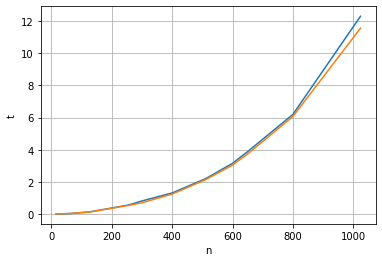

In [15]:
plt.plot(nn, maxx)
plt.plot(nn,pp)
plt.xlabel('n')
plt.ylabel('t')
plt.grid()
plt.show()

In [ ]:
# ^^ слишком быстро из-за numpy

In [17]:
 def product2(A,B):
    n = len(A)
    matr3=np.zeros((n,n))
    i=0
    while i<n:
        j= 0
        while j < n:
            l=0
            while l < n:
                matr3[i][j] += A[i][l] * B[l][j]
                l = l+1
            j=j+1
        i=i+1
    return matr3


In [18]:

start = time.time()
product2(matr(1024),matr(1024))   
end = time.time()
print(end - start)

1179.7890980243683


In [19]:
b = 10
t=[]
nn=[]
pp = []
maxx =[]
for k in  (16,32,64,128,256,300,400,512,600,650,800,1024):
    start = 0
    end = 0
    t=[]
    for _ in range (b):
        start = time.time()
        product2(matr(k),matr(k))   
        end = time.time()
        t.append(end-start)
    s = max(t)
    maxx.append(s) #максимальное время выполнения 
    pp.append(sum (t)/b) #среднее время выполнения
    nn.append(k)
    

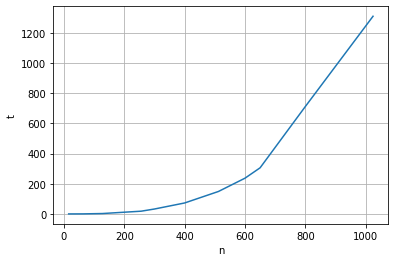

In [21]:
#plt.plot(nn, maxx)
plt.plot(nn,pp)
plt.xlabel('n')
plt.ylabel('t')
plt.grid()
plt.show()

In [ ]:
# ^^ очень долго считалось

In [4]:
#проверка размера матрицы
def check2rec(num):
    if num == 1:
        return True
    if num & 1:
        return False
    return check2rec(num >> 1)
check2rec(16)
def st2(x):
    y=1
    while y< x:
        y=2*y
    return y  


In [5]:
#дополнение матрицы до размера 2**N
def zero(matr1,matr2):
    k = len((matr1))
    if not check2rec(k):
        matr1 =np.pad(matr1, (0, st2(k)-k))
        matr2 =np.pad(matr2, (0, st2(k)-k))
   # print (matr1)
    return (matr1,matr2)
#zero(matr(10), matr(10))


In [6]:
def Strassen(matr1, matr2):
    a11=matr1[0,0]
    a12=matr1[0,1]
    a21=matr1[1,0]
    a22=matr1[1,1]
    b11=matr2[0,0]
    b12=matr2[0,1]
    b21=matr2[1,0]
    b22=matr2[1,1]
    p1 = (a11+a22) * (b11+b22)
    p2 = (a21+a22) * (b11)
    p3 = (a11) * (b12 - b22)
    p4 = (a22) * (b21 - b11)
    p5 = (a11+a12) * (b22)   
    p6 = (a21-a11) * (b11+b12)
    p7 = (a12-a22) * (b21+b22)
    return np.array(([p1 + p4 - p5 + p7,p3 + p5],[p2+p4,p1 + p3 - p2 + p6]))

#Strassen(matr(2),matr(2))   
def strassen(matr1, matr2):
    matr1, matr2 = zero(matr1,matr2)
    
    if len(matr1)==2:
        return Strassen(matr1, matr2)     
    else:
        k = len(matr1)//2
        a11 = matr1[:k,:k]
        a12 = matr1[:k,k:]
        a21 = matr1[k:,:k]
        a22 = matr1[k:,k:]
        b11 = matr2[:k,:k]
        b12 = matr2[:k,k:]
        b21 = matr2[k:,:k]
        b22 = matr2[k:,k:]
        p1= (strassen((a11+a22),(b11+b22)))
        p2 = (strassen((a21+a22),(b11)))
        p3 = (strassen((a11),(b12 - b22)))
        p4 = (strassen((a22),(b21 - b11)))
        p5 = (strassen((a11+a12),(b22))) 
        p6 = (strassen((a21-a11),(b11+b12)))
        p7 = (strassen((a12-a22),(b21+b22)))
        #print(np.array([[p1 + p4 - p5 + p7,p3 + p5],[p2+p4,p1 + p3 - p2 + p6]]))
        return np.array(([p1 + p4 - p5 + p7,p3 + p5],[p2+p4,p1 + p3 - p2 + p6]))
#print(matr(8))
#G=matr(3)
#F=matr(3)
#print(F,G)
#print('d',strassen(F,G))

#product(F,G)


In [10]:
b = 10
t=[]
n=[]
p = []
maks =[]
for k in (16,32,64,128,256,512,1024):
    start = 0
    end = 0
    t=[]
    for _ in range (b):
        start = time.time()
        strassen(matr(k),matr(k))   
        end = time.time()
        t.append(end-start)
    s = max(t)
    maks.append(s) #максимальное время выполнения 
    p.append(sum (t)/b) #среднее время выполнения
    n.append(k)

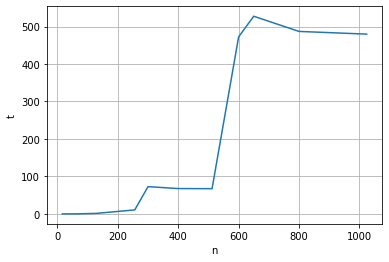

In [22]:
#plt.plot(n, maks)
plt.plot(n,p)
plt.xlabel('n')
plt.ylabel('t')
plt.grid()
plt.show()

In [12]:
b = 1
t=[]
n=[]
p = []
maks =[]
for k in (16,32,64,128,256,300,400,512,600,650,800,1024):
    start = 0
    end = 0
    t=[]
    for _ in range (b):
        start = time.time()
        strassen(matr(k),matr(k))   
        end = time.time()
        t.append(end-start)
    s = max(t)
    maks.append(s) #максимальное время выполнения 
    p.append(sum (t)/b) #среднее время выполнения
    n.append(k)

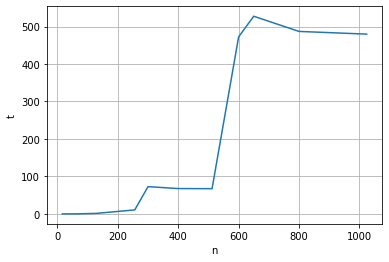

In [23]:
#plt.plot(n, maks)
plt.plot(n,p)
plt.xlabel('n')
plt.ylabel('t')
plt.grid()
plt.show()

In [ ]:
# ^^ 600, 650, 800 считается дольше из-за того, что нужно добавлять нули:((

In [7]:
start = 0
end = 0
start = time.time()
strassen(matr(1024),matr(1024))   
end = time.time()
print(end - start)

488.7634379863739
